# W11 - Word2vec

One of the most important addtion of Deep Learning to NLP is Word Vector.

**Definition** Word vectors are numerical vector representations of word semantics, or meaning, including literal and implied meaning. So word vectors can capture the connotation of words, like “peopleness,” “animalness,” “placeness,” “thingness,” and even “conceptness.” And they combine all that into a dense vector (no zeros) of floating point values. This dense vector enables queries and logical reasoning.

### Semantic queries and analogies

We have question:

Q: 'She invented something to do with physics in Europe in the early 20th century.'

We know that the answers is 'Maria Curie'.

Google does not get precise answer since the matching is according to index and not semantics.


Wuth word vectors we can do combination of meanings:

We can then generate answer:

This is the same aproach to semantic search from the previous lecture.

###  Analogy questions

We can rephrase question to search for analogy of a scientists in different branch of science:

Q: 'Who is to nuclear physics what Louis Pasteur is to germs?'

A: The answer is probably 'Maria Curie'. However this is not the question about Louis Pasteur!

The search engines as Google will give answers for Louis Pasteur.


Word vector will be as folows:

Similar 'analogy questions':

- Who is the Marie Curie of music?
- Marie Curie is to science as who is to music?


Word vector would be like:

Another question:

Q: The [Timbers](https://www.timbers.com/) are to Portland as what is to Seattle?

Formulation:

TIMBERS : PORTLAND :: ? : SEATTLE

wv['Timbers'] - wv['Portland'] + wv['Seattle'] = ?

<img src="TimberPortlandSeatle.png">
<img src="WordVectors.png">


**Note:**
- [Portland Timbers](https://www.timbers.com/)
- [Seatle Sounders](https://www.soundersfc.com/)

## Word2vec

Word2vec was first presented publicly in 2013 at the ACL conference by Tomas Mikolov, Kai Chen, Greg Corrado, Jeffrey Dean. The talk with the dryounding title [“Linguistic Regularities in Continuous Space Word Representations”](https://openreview.net/forum?id=idpCdOWtqXd60&noteId=C8Vn84fqSG8qa) described a surprisingly accurate language model. 

Word2vec embeddings were four times more accurate (45%) compared to  quivalent LSA models (11%) at answering analogy questions like those above. 

The accuracy improvement was so surprising, in fact, that Mikolov’s initial paper was rejected by the International Conference on Learning Representations. Reviewers thought that the model’s performance was too good to be true. It took nearly a year for Mikolov’s team to release the source code and get accepted to the Association for Computational Linguistics.



### How to compute word2vec

Word vectors represent the semantic meaning of words as vectors in the context of the training corpus. This allows you not only to answer analogy questions but also reason about the meaning of words in more general ways with vector algebra.


Pretrained word vector representations are available for corpora like [Wikipedia, DBPedia, Twitter, and Freebase](https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-model). 

These pretrained models are great starting points for word vector applications:
- Google provides a pretrained Word2vec model based on [English Google News articles](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM).
- Facebook published their word model, called [fastText](https://github.com/facebookresearch/fastText), for 294 languages.


We can compute it by:
- skip-gram approach - predicts the context of words (output words) from a word of interest (the input word).
-  continuous bag-of-words (CBOW) approach - predicts the target word (the output word) from the nearby words (input words). 

#### SKIP-GRAM APPROACH


Skip-grams are n-grams that contain gaps because you skip over intervening tokens. 

<img src="skip-gram.png">

You’re predicting “Claude” from the input token “painted,” and you skip over the token “Monet.”


The structure of neural network for skip-grams is typical.

<img src="skipGramMonet.png">

<img src="skipGramMonet2.png">

Examples of 5-grams:
<img src ="5gram.png">

#### CONTINUOUS BAG-OF-WORDS APPROACH


In the continuous bag-of-words (CBOW) approach, you’re trying to predict the center word based on the surrounding words. 

Instead of creating pairs of input and output tokens, you’ll create a multi-hot vector of all surrounding terms as an input vector. The multi-hot input vector is the sum of all one-hot vectors of the surrounding tokens to the center, target token.


<img src="CBOW1.png">

<img src="CBOW2.png">

<img src="CBOW5grams.png">

CBOW differs from BOW in the sense that we use a sliding window of sourrounding words:

<img src="CBOWvsBOW.png">

### Some hints:

Mikolov highlighted that **the skip-gram approach works well with small corpora and rare terms**. 

With the skip-gram approach, you’ll have more examples due to the network structure. 

But the **continuous bag-of-words approach shows higher accuracies for frequent words and is much faster to train**.


### Some imporvements of Word2vec comparing to Mikolov's original vectors

- **Frequent bigrams** - include some bigrams ("Elvis Presley; etc.) and trigrams as standard elements of word2vec;
- **Subsampling frequent tokens** - words are sampled during training in inverse proportion of their frequencies. This excludes stop words as 'the', 'a', 'and' etc.
- **Negative sampling** - instead of updating all word weights that weren’t included in the word window, Mikolov suggested sampling just a few negative samples (in the output vector) to update their weights. Instead of updating all weights, you pick n negative example word pairs (words that don’t match your target output for that example) and update the weights that contributed to their specific output. That way, the computation can be reduced dramatically and the performance of the trained network doesn’t decrease significantly.


## Gensim Word.2vec

We will use standard [Gensim](https://radimrehurek.com/gensim/models/word2vec.html) python implementation/embedding of word2vec.

Installation:

sudo pip install gensim

#### Example

We download 300 google word2vec:

In [3]:
#import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')

Alternatively, we can download the file:

wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

and then load the 200k most common words from the Google News corpus:

In [4]:
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200000)

**Warning** Keep in mind that a word vector model with a limited vocabulary will lead to a
lower performance of your NLP pipeline if your documents contain words that you haven’t loaded word vectors for. Therefore, you probably only want to limit the size of your word vector model during the development phase.

gensim.KeyedVectors.most_similar() - provides an efficient way to find the nearest neighbors for any given word vector. 

In [5]:
word_vectors.most_similar(positive=['cooking', 'potatoes'], topn=5)

[('cook', 0.6973530650138855),
 ('sweet_potatoes', 0.6600280404090881),
 ('vegetables', 0.6513738036155701),
 ('onions', 0.6512383222579956),
 ('baking', 0.6481683850288391)]

In [9]:
word_vectors.most_similar(positive=['usa', 'england'], topn=1)

[('europe', 0.731697678565979)]

gensim provides method that check which word does not match:

In [10]:
word_vectors.doesnt_match("potatoes milk cake computer".split())

'computer'

We can also check teh similarity of two words in the corpus:

In [11]:
word_vectors.similarity('princess', 'queen')

0.7070532

We can see the whole vector for a word as follows:

In [12]:
word_vectors['phone']

array([-0.01446533, -0.12792969, -0.11572266, -0.22167969, -0.07373047,
       -0.05981445, -0.10009766, -0.06884766,  0.14941406,  0.10107422,
       -0.03076172, -0.03271484, -0.03125   , -0.10791016,  0.12158203,
        0.16015625,  0.19335938,  0.0065918 , -0.15429688,  0.03710938,
        0.22753906,  0.1953125 ,  0.08300781,  0.03686523, -0.02148438,
        0.01483154, -0.21289062,  0.16015625,  0.29101562, -0.03149414,
       -0.05883789,  0.04418945, -0.11767578, -0.12597656,  0.08447266,
       -0.10791016, -0.11279297,  0.17871094,  0.04467773,  0.17675781,
       -0.17089844, -0.02160645, -0.00061417, -0.17480469, -0.04760742,
        0.06835938, -0.0546875 ,  0.04467773, -0.19628906, -0.18554688,
       -0.10839844, -0.06030273,  0.11474609,  0.08544922,  0.05859375,
        0.23925781, -0.07080078,  0.11816406, -0.11132812,  0.08300781,
       -0.04394531,  0.00970459, -0.1484375 ,  0.265625  , -0.13769531,
        0.23535156, -0.19824219,  0.31445312,  0.02734375,  0.16

##### Example - arithmetic on vectors:

We want to compute:

king + woman - man = queen, 

which was the example that got Mikolov and his advisor excited in the first place.

In [13]:
word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827)]

###  Generate your own word vector representations

In some cases you may want to generate your own word2vec model using specific vacabulary.
It consists a few steps:

1. Preprocessing - create a set of tokens for each sentence.
2. Setup model - setuup model parameters 
3. Training - start training; requires a high computational power and a lot of time;
4. Save model - save model in the file

##### Preprocesing

Create list of tokens for each sentence in corpus:

##### Setup

You have to initialize object of the [class gensim.word2vec](https://radimrehurek.com/gensim/models/word2vec.html).

###### Training

You have to initialize object of the [class gensim.word2vec](https://radimrehurek.com/gensim/models/word2vec.html).

##### Save model

Word2vec models can consume quite a bit of memory. 

But remember that only the weight matrix for the hidden layer is of interest. Once you’ve trained your word model, you can reduce the memory footprint by about half if you freeze your model and discard the unnecessary information. 

The following command will discard the unneeded output weights of your neural network:

You can save the trained model with the following command and preserve it for
later use:

##### Load saved model

## Competitors of Word2vec

#### GloVe (Global Vectors)

[Global Vectors](https://nlp.stanford.edu/projects/glove/) uses co-occurences of words and SVD decomposition. It produces the same weight matrix as word2vec, however the process of learning is usually faster. 

The model was produced at Stanford University.

Advantages of GloVe:
- Faster training
- Better RAM/CPU efficiency (can handle larger documents)
- More efficient use of data (helps with smaller corpora)
- More accurate for the same amount of training


<img src="word_vectors_small.jpg">

GloVe is avaliabel under python in [glove-python library](https://github.com/maciejkula/glove-python).

Installation:

pip install glove_python


Usage:

### fastText

[fastText](https://fasttext.cc/) invented in Facebook's AI Research (FAIR) lab looks on n-characters than n-words in word2vec.

[FastText is also implemented in gensim library](https://radimrehurek.com/gensim/models/fasttext.html).


First you have to download a trained model fo your language:

https://fasttext.cc/docs/en/crawl-vectors.html

and then set up MODEL_PATH to the model you downloaded.

### Word2vec vs LSA

LSA and GloVe uses similar principles - mainley SVD for constructing weigth matrix.

Word2vec gets more use out of the same number of words in its documents by creating a sliding window that overlaps from one document to the next. This way it can reuse the same words five times before sliding on.

**Incremental training** Both LSA and Word2vec algorithms allow adding new documents to your corpus and adjusting your existing word vectors to account for the co-occurrences in the new documents. But only the existing bins in your lexicon can be updated. Adding completely new words would change the total size of your vocabulary and therefore your one-hot vectors would change. That requires starting the training over if you want to capture the new word in your model.


LSA trains faster than Word2vec does. And for long documents, it does a better job
of discriminating and clustering those documents.


**Comparision**
LSA:
- Faster training
- Better discrimination between longer documents

Word2vec and GloVe:
- More efficient use of large corpora
- More accurate reasoning with words, such as answering analogy questions


### Similarities between words by word2vec

We will show how to use word2vec to compute cosine similarity.

In [15]:
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200000)

In [25]:
word_vectors['Illinois']

array([ 2.46093750e-01,  2.44140625e-01,  1.42578125e-01,  3.32031250e-01,
       -1.62109375e-01,  1.80664062e-02, -2.53906250e-01,  1.89453125e-01,
        3.73535156e-02, -9.39941406e-03,  1.66992188e-01,  1.97265625e-01,
        9.32617188e-02, -1.24511719e-01,  2.06054688e-01,  1.16210938e-01,
        1.66992188e-01,  2.29492188e-02,  5.71289062e-02, -1.12304688e-02,
        9.13085938e-02, -9.52148438e-02, -2.32421875e-01,  1.71875000e-01,
       -4.54101562e-02,  2.17285156e-02, -1.70898438e-01,  1.32812500e-01,
       -3.57421875e-01,  6.83593750e-02,  2.20703125e-01,  9.70458984e-03,
        1.09863281e-02, -1.64062500e-01,  2.79296875e-01,  5.85937500e-02,
       -7.95898438e-02, -7.37304688e-02,  1.61132812e-01,  3.49609375e-01,
       -1.64794922e-02, -2.53906250e-02, -8.88671875e-02, -3.16406250e-01,
       -3.32031250e-01,  1.73828125e-01,  7.95898438e-02,  2.85156250e-01,
        8.00781250e-02, -7.27539062e-02, -1.27929688e-01,  1.62109375e-01,
       -1.05468750e-01, -

In [22]:
word_vectors['Boston']

array([-1.75781250e-01,  1.90429688e-01,  3.19824219e-02,  2.75390625e-01,
        1.04980469e-01,  4.71191406e-02, -2.83203125e-01, -1.47460938e-01,
        6.17675781e-02, -1.53320312e-01, -2.26562500e-01,  1.54418945e-02,
        7.86781311e-05,  2.03125000e-01,  2.53906250e-01,  7.37304688e-02,
       -2.05078125e-02, -1.42578125e-01,  1.84570312e-01, -6.29882812e-02,
       -9.17968750e-02, -1.79687500e-01, -2.99072266e-02, -1.70898438e-01,
       -7.66601562e-02,  3.82812500e-01,  7.71484375e-02,  1.41601562e-01,
       -4.08203125e-01,  1.38671875e-01,  2.11914062e-01, -3.68652344e-02,
       -7.22656250e-02, -8.54492188e-02,  3.73535156e-02, -5.52368164e-03,
        1.27929688e-01, -2.22656250e-01, -2.38281250e-01,  2.55859375e-01,
        1.30859375e-01,  2.89306641e-02, -3.41796875e-02, -1.04492188e-01,
       -3.67187500e-01,  1.94335938e-01, -1.29882812e-01,  7.72094727e-03,
        4.55078125e-01,  1.25976562e-01,  1.07910156e-01,  3.55468750e-01,
        1.06933594e-01, -

We compute Euclidean distance between vectors:

In [24]:
import numpy as np
np.linalg.norm(word_vectors['Illinois'] - word_vectors['Illini'])


3.36538

Now we compute cos_similarity:

In [27]:
import numpy as np

cos_similarity = np.dot(word_vectors['Illinois'], word_vectors['Illini']) / ( np.linalg.norm(word_vectors['Illinois']) *  np.linalg.norm(word_vectors['Illini']))

cos_similarity

0.5501352

Now we have all data to construct semantic search engine.

##### Plotting word2vec

Now we use PCA to project Word2vec to two first axes that carries highest variance (information). This allows us to plot word2vec in the plane.

In [63]:
def display_pca_scatterplot(model, words=None, sample=0):
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)



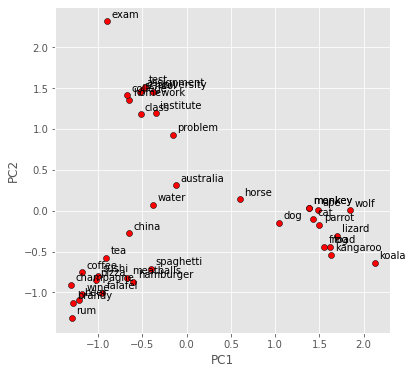

In [64]:
display_pca_scatterplot(word_vectors, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wolf', 'australia', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])



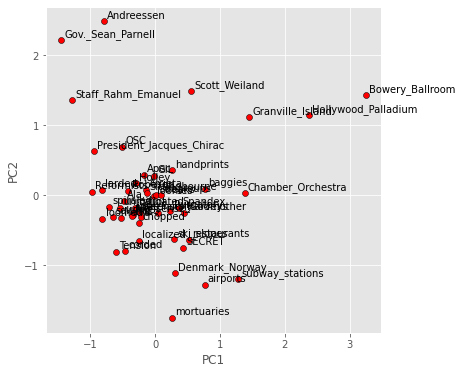

In [65]:
display_pca_scatterplot(word_vectors, sample=50)

## Solution to analogy problem

In [66]:
def analogy(model, x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

What is the corresponding word to 'long' as 'tallest' to 'tall'?

In [67]:
analogy(word_vectors,'tall', 'tallest', 'long')

'longest'

What is the corresponding word to 'bad' as 'fantastic' to 'good'?

In [68]:
analogy(word_vectors,'good', 'fantastic', 'bad')

'horrible'

.. and now a bit strange:

In [69]:
analogy(word_vectors,'japan', 'japanese', 'australia')

'canada'

...and remember - we can rule some odd words:

In [72]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal
